In [1]:
!pip install seaborn scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    "student_id": range(1, 201),
    "quiz_avg": np.random.randint(30, 100, 200),
    "assignment_completion": np.random.randint(40, 100, 200),
    "study_hours": np.random.randint(1, 20, 200),
    "attendance": np.random.randint(50, 100, 200)
})

data["final_result"] = np.where(
    (data["quiz_avg"] >= 50) &
    (data["assignment_completion"] >= 60) &
    (data["attendance"] >= 70),
    "Pass",
    "Needs Support"
)

data.head()


,student_id,quiz_avg,assignment_completion,study_hours,attendance,final_result
0,1,81,88,4,85,Pass
1,2,44,41,6,84,At Risk
2,3,90,40,13,68,At Risk
3,4,50,87,15,69,At Risk
4,5,53,51,3,67,At Risk


In [3]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             200 non-null    int64 
 1   quiz_avg               200 non-null    int32 
 2   assignment_completion  200 non-null    int32 
 3   study_hours            200 non-null    int32 
 4   attendance             200 non-null    int32 
 5   final_result           200 non-null    object
dtypes: int32(4), int64(1), object(1)
memory usage: 6.4+ KB


,student_id,quiz_avg,assignment_completion,study_hours,attendance
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,63.720000,71.345000,10.110000,72.845000
std,57.879185,21.294574,16.757387,5.575241,14.357285
min,1.000000,30.000000,40.000000,1.000000,50.000000
25%,50.750000,44.000000,59.000000,5.000000,60.750000
50%,100.500000,64.000000,72.000000,10.000000,72.500000
75%,150.250000,83.000000,86.000000,15.000000,83.250000
max,200.000000,99.000000,99.000000,19.000000,99.000000


In [4]:
data.isnull().sum()


student_id               0
quiz_avg                 0
assignment_completion    0
study_hours              0
attendance               0
final_result             0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["final_result"] = le.fit_transform(data["final_result"])


In [6]:
Student Data → Preprocessing → ML Model → Performance Prediction → Recommendation


SyntaxError: invalid character '→' (U+2192) (2993740583.py, line 1)

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(["student_id", "final_result"], axis=1)
y = data["final_result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.43      0.30      0.35        10

    accuracy                           0.72        40
   macro avg       0.61      0.58      0.59        40
weighted avg       0.70      0.72      0.71        40



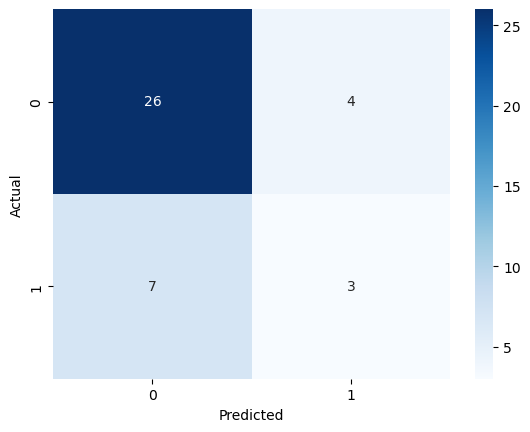

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print('Decision Tree Accuracy:', accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
